In [1]:
#utilities
import os
import sys
from pathlib import Path
import json

#data science librairies
import numpy as np
import pandas as pd

# vizualisation libraires
import matplotlib.pyplot as plt
import seaborn as sns

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"/scripts")

#import librairies for technical analysis
from talib import MA, MACD, ADX, RSI, mass_index, get_technical_indicators

In [2]:
data_path = "../data/raw/"
eth_file = data_path+"data_ETH.csv"

#create a function
df_eth = pd.read_csv(eth_file)
df_eth['Date'] = pd.to_datetime(df_eth['Date'],unit="s")
#df_eth.index = df_eth['Date']
#del df_eth['Date']
del df_eth['Ignore']
# del df_btc['CloseTime']
df_eth

,Date,Open,High,Low,Close,Volume,CloseTime,QuoteAssetVolume,NumberofTrade,TakerbuybaseV,TakerbuyquoteV
0,2017-08-17,301.13,312.18,298.00,302.00,7030.71034,1503014399999,2.154655e+06,4522,6224.58999,1.908705e+06
1,2017-08-18,302.00,311.79,283.94,293.96,9537.84646,1503100799999,2.858947e+06,5658,7452.43542,2.240813e+06
2,2017-08-19,293.31,299.90,278.00,290.91,2146.19773,1503187199999,6.200226e+05,1795,1537.97550,4.447136e+05
3,2017-08-20,289.41,300.53,282.85,299.10,2510.13871,1503273599999,7.428479e+05,2038,2186.68739,6.475061e+05
4,2017-08-21,299.10,346.52,294.60,323.29,5219.44542,1503359999999,1.689472e+06,3925,4004.19967,1.297977e+06
...,...,...,...,...,...,...,...,...,...,...,...
1322,2021-03-31,1840.41,1947.29,1768.15,1919.37,746995.85910,1617235199999,1.387448e+09,1040362,377271.88679,7.009703e+08
1323,2021-04-01,1919.37,1984.77,1885.02,1968.05,741585.07266,1617321599999,1.438752e+09,994836,371883.72089,7.217367e+08
1324,2021-04-02,1968.05,2146.00,1948.48,2133.69,846197.93215,1617407999999,1.719752e+09,1218698,436010.09375,8.866538e+08
1325,2021-04-03,2133.69,2138.12,1996.30,2008.52,770176.32192,1617494399999,1.601516e+09,1107620,363187.43008,7.553749e+08


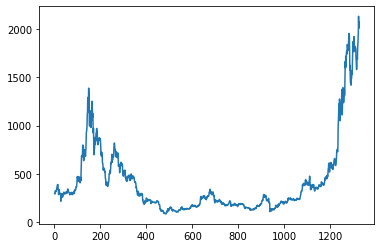

In [3]:
db_eth = df_eth.copy()
db_eth['MakerbuybaseV'] = db_eth['Volume'] - db_eth['TakerbuybaseV']
db_eth['log_return'] = np.log(db_eth['Close']) - np.log(db_eth['Close'].shift(1))
db_eth = db_eth.dropna()
db_eth['Close'].plot()

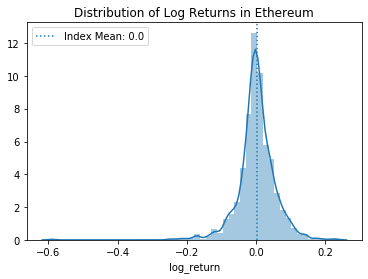

In [8]:
sns.distplot(db_eth['log_return'])
mean_return = db_eth['log_return'].mean()
plt.title('Distribution of Log Returns in Ethereum')
plt.axvline(mean_return, ls=':', label='Index Mean: {}'.format(round(mean_return, 2)))
plt.legend()

In [27]:
db_eth.describe()

,Open,High,Low,Close,Volume,CloseTime,QuoteAssetVolume,NumberofTrade,TakerbuybaseV,TakerbuyquoteV,MakerbuybaseV,log_return,Return
count,1326.000000,1326.000000,1326.000000,1326.000000,1.326000e+03,1.326000e+03,1.326000e+03,1.326000e+03,1.326000e+03,1.326000e+03,1.326000e+03,1326.000000,1326.000000
mean,416.122428,433.162368,396.565784,417.450588,5.045741e+05,1.560341e+12,2.504553e+08,2.614904e+05,2.530509e+05,1.252964e+08,2.515232e+05,0.001454,0.002900
std,387.067275,405.280360,366.342675,389.732747,5.088824e+05,3.308494e+10,5.048365e+08,3.194865e+05,2.526322e+05,2.517007e+08,2.567540e+05,0.054240,0.053127
min,83.750000,85.000000,81.790000,83.760000,1.060567e+03,1.503101e+12,3.027397e+05,1.431000e+03,5.666464e+02,1.561580e+05,3.234513e+02,-0.590534,-0.445969
25%,180.665000,185.417500,175.352500,180.720000,1.582391e+05,1.531721e+12,4.417803e+07,1.025462e+05,8.116782e+04,2.225781e+07,7.762383e+04,-0.021033,-0.020813
50%,268.835000,279.290000,259.600000,268.810000,3.413981e+05,1.560341e+12,8.298241e+07,1.583415e+05,1.732292e+05,4.320531e+07,1.703623e+05,0.000757,0.000758
75%,468.277500,484.240000,451.822500,469.217500,7.172194e+05,1.588961e+12,1.780643e+08,2.734370e+05,3.573460e+05,8.915400e+07,3.563150e+05,0.028240,0.028642
max,2133.690000,2146.000000,1996.300000,2133.690000,4.663240e+06,1.617581e+12,4.303634e+09,2.557613e+06,2.314458e+06,2.157639e+09,2.348782e+06,0.233501,0.263014


In [28]:
db_eth.corr()

,Open,High,Low,Close,Volume,CloseTime,QuoteAssetVolume,NumberofTrade,TakerbuybaseV,TakerbuyquoteV,MakerbuybaseV,log_return,Return
Open,1.000000,0.998483,0.996402,0.996441,0.209009,0.194931,0.712678,0.660672,0.206272,0.711593,0.211292,0.003022,0.006425
High,0.998483,1.000000,0.996267,0.998465,0.217474,0.191276,0.718954,0.666814,0.215628,0.718760,0.218863,0.034094,0.038985
Low,0.996402,0.996267,1.000000,0.997897,0.195741,0.204899,0.700673,0.648121,0.194218,0.700833,0.196855,0.046127,0.048339
Close,0.996441,0.998465,0.997897,1.000000,0.209476,0.198797,0.712674,0.660079,0.208395,0.713223,0.210128,0.066051,0.070044
Volume,0.209009,0.217474,0.195741,0.209476,1.000000,0.666986,0.700460,0.812387,0.998995,0.699432,0.999027,0.005020,0.032042
CloseTime,0.194931,0.191276,0.204899,0.198797,0.666986,1.000000,0.539258,0.622732,0.665840,0.538954,0.666805,0.045105,0.042972
QuoteAssetVolume,0.712678,0.718954,0.700673,0.712674,0.700460,0.539258,1.000000,0.969385,0.700558,0.999552,0.698988,0.030827,0.040474
NumberofTrade,0.660672,0.666814,0.648121,0.660079,0.812387,0.622732,0.969385,1.000000,0.811984,0.968740,0.811189,0.016917,0.031645
TakerbuybaseV,0.206272,0.215628,0.194218,0.208395,0.998995,0.665840,0.700558,0.811984,1.000000,0.700499,0.996045,0.027234,0.054066
TakerbuyquoteV,0.711593,0.718760,0.700833,0.713223,0.699432,0.538954,0.999552,0.968740,0.700499,1.000000,0.697009,0.042492,0.052269


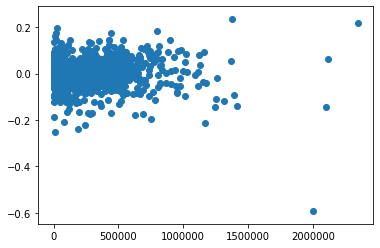

In [15]:
plt.scatter(db_eth['MakerbuybaseV'],db_eth['log_return'])

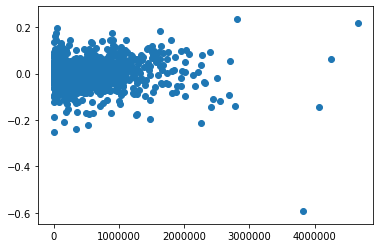

In [19]:
plt.scatter(db_eth['Volume'],db_eth['log_return'])

In [5]:
df1 = get_technical_indicators(db_eth)
df1

,Date,Open,High,Low,Close,Volume,CloseTime,QuoteAssetVolume,NumberofTrade,TakerbuybaseV,...,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum
1,2017-08-18,302.00,311.79,283.94,293.96,9537.84646,1503100799999,2.858947e+06,5658,7452.43542,...,NaN,NaN,293.960000,293.960000,0.000000,NaN,NaN,NaN,293.960000,292.96
2,2017-08-19,293.31,299.90,278.00,290.91,2146.19773,1503187199999,6.200226e+05,1795,1537.97550,...,NaN,NaN,292.376346,292.307917,-0.068429,NaN,NaN,NaN,291.672500,289.91
3,2017-08-20,289.41,300.53,282.85,299.10,2510.13871,1503273599999,7.428479e+05,2038,2186.68739,...,NaN,NaN,294.792090,294.958868,0.166779,NaN,NaN,NaN,296.814615,298.10
4,2017-08-21,299.10,346.52,294.60,323.29,5219.44542,1503359999999,1.689472e+06,3925,4004.19967,...,NaN,NaN,302.758860,303.901899,1.143039,NaN,NaN,NaN,314.685500,322.29
5,2017-08-22,321.04,330.41,144.21,309.80,7956.35088,1503446399999,2.454426e+06,6577,4433.78132,...,NaN,NaN,304.391729,305.504392,1.112663,NaN,NaN,NaN,311.415041,308.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1322,2021-03-31,1840.41,1947.29,1768.15,1919.37,746995.85910,1617235199999,1.387448e+09,1040362,377271.88679,...,1751.541429,1769.069048,1740.916119,1767.232738,26.316619,94.341937,1957.752921,1580.385174,1885.744567,1918.37
1323,2021-04-01,1919.37,1984.77,1885.02,1968.05,741585.07266,1617321599999,1.438752e+09,994836,371883.72089,...,1806.157143,1775.843810,1757.740851,1798.127702,40.386851,104.578933,1985.001675,1566.685944,1940.614856,1967.05
1324,2021-04-02,1968.05,2146.00,1948.48,2133.69,846197.93215,1617407999999,1.719752e+09,1218698,436010.09375,...,1868.278571,1793.348095,1785.588936,1849.752671,64.163734,128.134179,2049.616453,1537.079738,2069.331619,2132.69
1325,2021-04-03,2133.69,2138.12,1996.30,2008.52,770176.32192,1617494399999,1.601516e+09,1107620,363187.43008,...,1910.548571,1797.451429,1802.102348,1874.178414,72.076065,136.888907,2071.229243,1523.673614,2028.790540,2007.52


In [6]:
df1.corr()

,Open,High,Low,Close,Volume,CloseTime,QuoteAssetVolume,NumberofTrade,TakerbuybaseV,TakerbuyquoteV,...,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum
Open,1.000000,0.998483,0.996402,0.996441,0.209009,0.194931,0.712678,0.660672,0.206272,0.711593,...,0.995889,0.980929,0.982659,0.993718,0.589341,0.853295,0.982868,0.951411,0.998355,0.996441
High,0.998483,1.000000,0.996267,0.998465,0.217474,0.191276,0.718954,0.666814,0.215628,0.718760,...,0.995055,0.979212,0.980662,0.992653,0.597360,0.859704,0.982810,0.947211,0.999230,0.998465
Low,0.996402,0.996267,1.000000,0.997897,0.195741,0.204899,0.700673,0.648121,0.194218,0.700833,...,0.992564,0.979343,0.981313,0.991230,0.577640,0.839628,0.978694,0.953815,0.998037,0.997897
Close,0.996441,0.998465,0.997897,1.000000,0.209476,0.198797,0.712674,0.660079,0.208395,0.713223,...,0.993338,0.978097,0.979757,0.991326,0.592845,0.852466,0.980374,0.948140,0.999563,1.000000
Volume,0.209009,0.217474,0.195741,0.209476,1.000000,0.666986,0.700460,0.812387,0.998995,0.699432,...,0.198880,0.164628,0.160471,0.188735,0.352039,0.204139,0.177761,0.140144,0.208861,0.209476
CloseTime,0.194931,0.191276,0.204899,0.198797,0.666986,1.000000,0.539258,0.622732,0.665840,0.538954,...,0.187154,0.162042,0.157328,0.180721,0.303397,0.024870,0.137902,0.194467,0.197169,0.198797
QuoteAssetVolume,0.712678,0.718954,0.700673,0.712674,0.700460,0.539258,1.000000,0.969385,0.700558,0.999552,...,0.702015,0.665708,0.661589,0.691574,0.614696,0.612376,0.674027,0.634998,0.712609,0.712674
NumberofTrade,0.660672,0.666814,0.648121,0.660079,0.812387,0.622732,0.969385,1.000000,0.811984,0.968740,...,0.652127,0.621476,0.616394,0.643008,0.559911,0.573357,0.629602,0.592256,0.660396,0.660079
TakerbuybaseV,0.206272,0.215628,0.194218,0.208395,0.998995,0.665840,0.700558,0.811984,1.000000,0.700499,...,0.196465,0.162307,0.158250,0.186442,0.350253,0.202665,0.175549,0.137717,0.207235,0.208395
TakerbuyquoteV,0.711593,0.718760,0.700833,0.713223,0.699432,0.538954,0.999552,0.968740,0.700499,1.000000,...,0.701283,0.665120,0.660995,0.690957,0.614173,0.612284,0.673526,0.634293,0.712628,0.713223


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


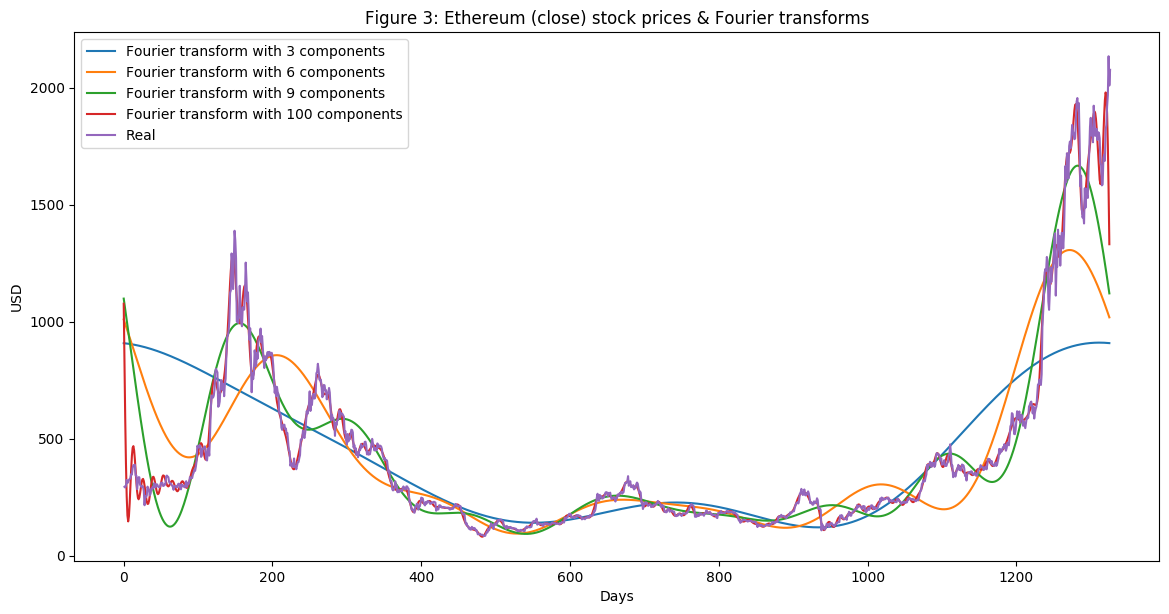

In [9]:
data_FT = db_eth[['Date', 'Close']]

close_fft = np.fft.fft(np.asarray(data_FT['Close'].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

plt.figure(figsize=(14, 7), dpi=100)
fft_list = np.asarray(fft_df['fft'].tolist())
for num_ in [3, 6, 9, 100]:
    fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_]=0
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))
plt.plot(data_FT['Close'],  label='Real')
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('Figure 3: Ethereum (close) stock prices & Fourier transforms')
plt.legend()
plt.show()

In [10]:
fft_df

,fft,absolute,angle
0,553539.480000+0.000000j,553539.480000,0.000000
1,232566.530976-43050.427879j,236517.506056,-0.183038
2,88818.962696-12380.298824j,89677.644558,-0.138496
3,7134.029570+75133.444340j,75471.377596,1.476129
4,35285.710564+92553.324231j,99051.497698,1.206560
...,...,...,...
1321,15715.544197-97697.746626j,98953.666053,-1.411304
1322,35285.710564-92553.324231j,99051.497698,-1.206560
1323,7134.029570-75133.444340j,75471.377596,-1.476129
1324,88818.962696+12380.298824j,89677.644558,0.138496
